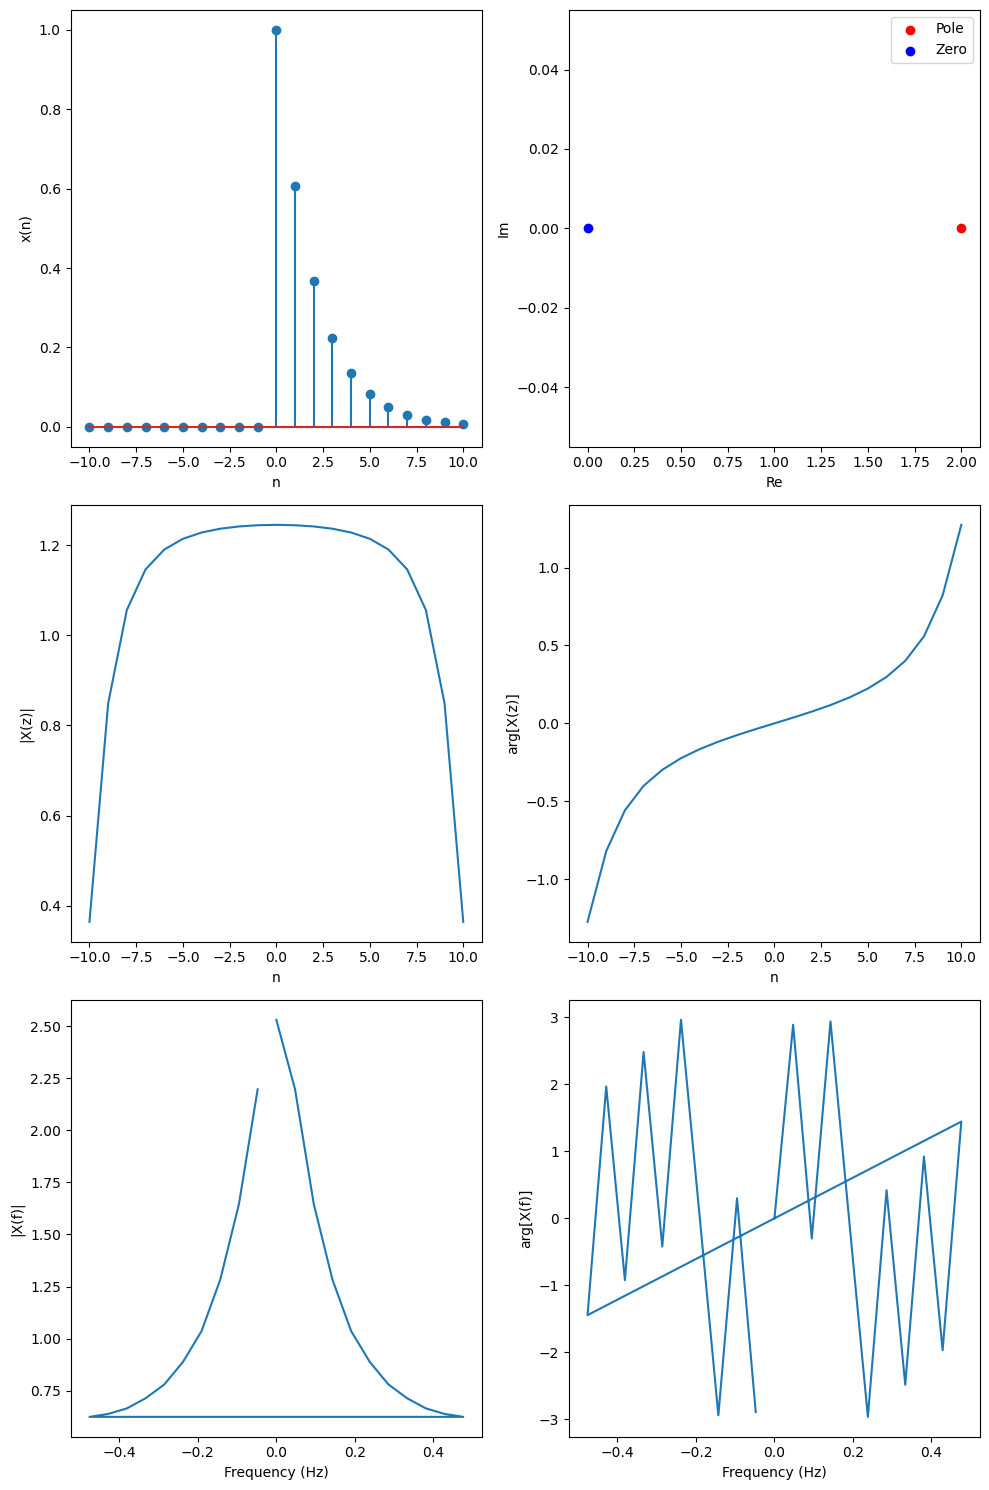

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def x(n, a):
    return np.exp(-a * n) * (n >= 0)

def X(z, a):
    return (1 - z * -1) / (1 - np.exp(-a) * z * -1)

a = 0.5
n = np.arange(-10, 11)
z = np.exp(1j * 2 * np.pi * n / len(n))

fig, ax = plt.subplots(3, 2, figsize=(10, 15))

# Plot the signal x(n)
ax[0, 0].stem(n, x(n, a), use_line_collection=True)
ax[0, 0].set_xlabel("n")
ax[0, 0].set_ylabel("x(n)")

# Plot the poles and zeros of X(z)
poles = 1 / a
zeros = 0
ax[0, 1].scatter(np.real(poles), np.imag(poles), color="red", label="Pole")
ax[0, 1].scatter(np.real(zeros), np.imag(zeros), color="blue", label="Zero")
ax[0, 1].set_xlabel("Re")
ax[0, 1].set_ylabel("Im")
ax[0, 1].legend()

# Plot the magnitude and phase of X(z)
magnitude = np.abs(X(z, a))
phase = np.angle(X(z, a))
ax[1, 0].plot(n, magnitude)
ax[1, 0].set_xlabel("n")
ax[1, 0].set_ylabel("|X(z)|")
ax[1, 1].plot(n, phase)
ax[1, 1].set_xlabel("n")
ax[1, 1].set_ylabel("arg[X(z)]")

# Plot the Fourier Transform of x(n)
xf = np.fft.fft(x(n, a))
freq = np.fft.fftfreq(len(xf), 1)
ax[2, 0].plot(freq, np.abs(xf))
ax[2, 0].set_xlabel("Frequency (Hz)")
ax[2, 0].set_ylabel("|X(f)|")
ax[2, 1].plot(freq, np.angle(xf))
ax[2, 1].set_xlabel("Frequency (Hz)")
ax[2, 1].set_ylabel("arg[X(f)]")

plt.tight_layout()
plt.show()